In [13]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from keras.applications import VGG16
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
train_dir="d:\\AI Project\\Nail_model\\Data\\train"
test_dir="d:\\AI Project\\Nail_model\\Data\\test"

train_datage = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_set = train_datage.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset='training'
)

valid_set = train_datage.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset='validation'
)

test_datage=ImageDataGenerator(rescale=1/255)

test_set=test_datage.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
    )

Found 933 images belonging to 3 classes.
Found 231 images belonging to 3 classes.
Found 299 images belonging to 3 classes.


In [15]:
train_set.class_indices

{'healthy': 0, 'onychomycosis': 1, 'psoriasis': 2}

In [16]:
labels=['healthy', 'onychomycosis', 'psoriasis']

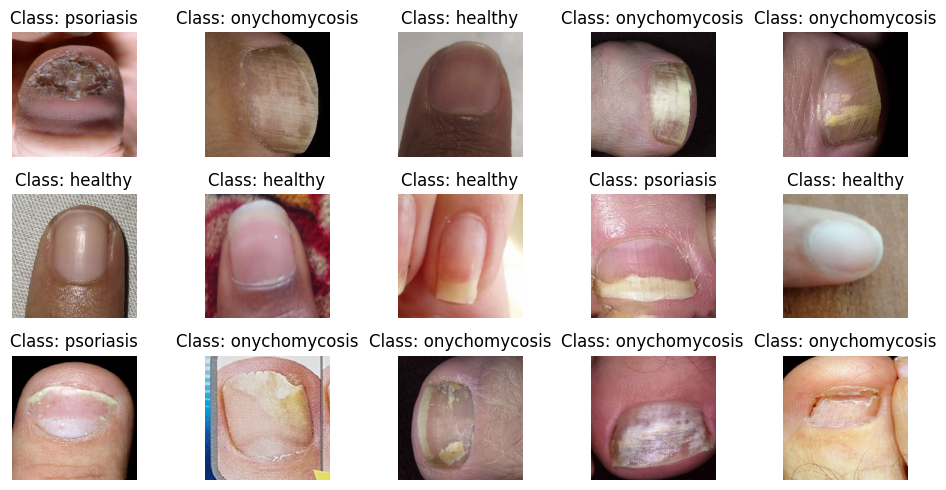

In [17]:
plt.figure(figsize=(10, 5))

for i in range(15):  
    plt.subplot(3, 5, i+1) 
    image, label = train_set.next()  
    plt.imshow(image[0])  
    plt.axis("off")  
    plt.title(f"Class: {labels[np.argmax(label)]}") 

plt.tight_layout()  
plt.show()

In [26]:
base_model = VGG16(
    input_shape=[224, 224, 3],
    include_top=False,  
    pooling='avg',
    weights='imagenet'  
)

base_model.trainable = False


model = Sequential([

    base_model, 
    BatchNormalization(),

    #Conv2D(100, (3, 3), activation="relu", input_shape=[64, 64, 3]),
    #BatchNormalization(),
    #MaxPooling2D((2, 2)),

    #Conv2D(128, (3, 3), activation="relu"),
    #BatchNormalization(),
    #MaxPooling2D((2, 2)),

    #Conv2D(64, (3, 3), activation="relu"),
    #BatchNormalization(),
    #MaxPooling2D((2, 2)),


    Flatten(),

    Dense(512, activation="relu"),
    Dropout(0.5),
        
    Dense(100, activation="relu"),
    Dropout(0.5),
    
    Dense(50, activation="relu"),
    Dropout(0.5),
    
    Dense(3, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               51300     
                                                      

In [27]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
# استخدام EarlyStopping لتجنب overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

In [29]:
history=model.fit(train_set, validation_data=valid_set, epochs=15 ,callbacks=[early_stopping])

Epoch 1/15
30/30 [==============================] - 69s 2s/step - loss: 1.2281 - accuracy: 0.4255 - val_loss: 1.0648 - val_accuracy: 0.3420
Epoch 2/15
30/30 [==============================] - 69s 2s/step - loss: 0.9058 - accuracy: 0.5659 - val_loss: 1.0193 - val_accuracy: 0.5065
Epoch 3/15
30/30 [==============================] - 62s 2s/step - loss: 0.7139 - accuracy: 0.6956 - val_loss: 0.9719 - val_accuracy: 0.5714
Epoch 4/15
30/30 [==============================] - 61s 2s/step - loss: 0.6816 - accuracy: 0.6860 - val_loss: 0.9165 - val_accuracy: 0.6320
Epoch 5/15
30/30 [==============================] - 63s 2s/step - loss: 0.5726 - accuracy: 0.7546 - val_loss: 0.8926 - val_accuracy: 0.6061
Epoch 6/15
30/30 [==============================] - 62s 2s/step - loss: 0.4685 - accuracy: 0.7942 - val_loss: 0.8177 - val_accuracy: 0.6494
Epoch 7/15
30/30 [==============================] - 63s 2s/step - loss: 0.4325 - accuracy: 0.8232 - val_loss: 0.7668 - val_accuracy: 0.6840
Epoch 8/15
30/30 [==

In [30]:
train_loss,train_acc=model.evaluate(train_set)
print(f"traint_accuracy : {train_acc}")
print(f"train_loss : {train_loss}")

30/30 [==============================] - 53s 2s/step - loss: 0.0997 - accuracy: 0.9871
traint_accuracy : 0.9871382713317871
train_loss : 0.09970163553953171


In [31]:
test_loss,test_acc=model.evaluate(test_set)
print(f"test_accuracy : {test_acc}")
print(f"test_loss : {test_loss}")

10/10 [==============================] - 17s 2s/step - loss: 0.5005 - accuracy: 0.8161
test_accuracy : 0.8160535097122192
test_loss : 0.5004554986953735


In [32]:
model.save("nail.h5")

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.10.1


In [2]:
# التحقق من توفر GPU
import tensorflow as tf
print("GPUs Available: ", tf.config.list_physical_devices('GPU'))

GPUs Available:  []
